### 가설
1. 보건 유형의 상담 방식 중 전화, 방문, 이메일 중에 바로 정보를 얻을 수 있고 집안에서 해결할 수 있는 전화가 제일 비율이 높을 것이다.
2. 코로나 후에 방문 비율의 감소가 더 심해졌을것이다  
-----
비대면을 선호하는 상담자들(온라인 서비스 구축 이유), 각 언어로 상담 받을 수 있는 전화를 더 선호(언어적 어려움)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('monthly_counsel.csv', engine='python')
df

,년월,기관/유형,전화,방문,이메일,게시판,화상상담,이동상담,합계
0,202103,교육,65,9,48,0,0,0,122
1,202103,교통,14,1,0,0,0,0,15
2,202103,금융,26,1,0,0,0,0,27
3,202103,기타,142,10,1,0,0,0,153
4,202103,노무,403,46,1,0,0,0,450
...,...,...,...,...,...,...,...,...,...
310,201907,전년도 총계,2221,504,91,2,0,0,2818
311,201907,정보통신,7,4,0,0,0,0,11
312,201907,주거,34,7,1,0,0,0,42
313,201907,출입국,455,184,4,0,0,0,643


In [3]:
df_sample = df.iloc[:,[0,1,2,3,4]]
df_sample

,년월,기관/유형,전화,방문,이메일
0,202103,교육,65,9,48
1,202103,교통,14,1,0
2,202103,금융,26,1,0
3,202103,기타,142,10,1
4,202103,노무,403,46,1
...,...,...,...,...,...
310,201907,전년도 총계,2221,504,91
311,201907,정보통신,7,4,0
312,201907,주거,34,7,1
313,201907,출입국,455,184,4


In [60]:
df2 = df_sample.groupby(by=['년월']).sum()

df_2 = df2.reset_index()
df_2['년월'] = df_2['년월'].astype(str)
df_2

,년월,전화,방문,이메일
0,201907,4442,1008,182
1,201908,3680,1226,126
2,201909,3706,1032,80
3,201910,3926,1146,36
4,201911,3690,928,32
5,201912,3164,718,40
6,202001,4200,972,98
7,202002,4574,810,358
8,202003,4574,630,186
9,202004,5462,1222,222


In [11]:
df3 = df_sample.groupby(by=['기관/유형']).sum()

df_3 = df3.reset_index()
df_3 = df_3.iloc[:,[0,2,3,4]]
df_3

,기관/유형,전화,방문,이메일
0,교육,2920,493,1749
1,교통,280,15,6
2,금융,467,58,2
3,기타,3210,198,40
4,노무,10138,1260,30
5,문화/관광,159,28,9
6,보건/복지,7535,1118,181
7,비즈니스,257,31,9
8,안전,752,152,19
9,여성/가족,534,65,10


In [41]:
df4 = df_3.loc[6]
df5 = df4.transpose()
df6 = df5.reset_index()
df6 = df6.rename(columns=df6.loc[0])
df6 = df6.drop(0)
df6

,기관/유형,보건/복지
1,전화,7535
2,방문,1118
3,이메일,181


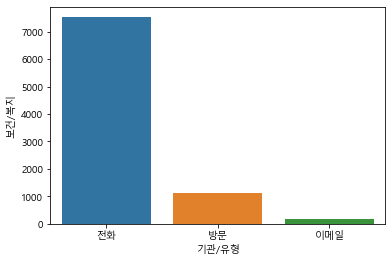

In [44]:
# 가설1
plt.rc('font', family='Malgun Gothic')

sns.barplot(data=df6, x = '기관/유형', y = '보건/복지')

plt.show()

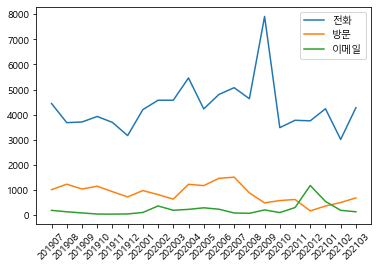

In [78]:
#가설2

plt.plot(df_2['년월'],df_2['전화'],label='전화')
plt.plot(df_2['년월'],df_2['방문'],label='방문')
plt.plot(df_2['년월'],df_2['이메일'],label='이메일')
plt.xticks(rotation=45)
plt.legend()
plt.show()